In [ ]:
pip freeze # выводит версии библиотек 

In [ ]:
pip freeze > requirements.txt # файл с версиями библиотек 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import plotly.express as px
import tensorflow as tf
import sklearn

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from tensorflow import keras as keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation
from pandas import read_excel, DataFrame, Series
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from tensorflow.keras.models import Sequential
from numpy.random import seed
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Загружаем первый датасет (базальтопластик) и посмотрим на названия столбцов
df_bp = pd.read_excel(r"C:\Users\leon-\BKP\data\X_bp.xlsx")
df_bp.shape

(1023, 11)

In [3]:
df_bp # выведем датасет для наглядности в виде таблицы

Unnamed: 0  Соотношение матрица-наполнитель  Плотность, кг/м3  \
0              0                         1.857143       2030.000000   
1              1                         1.857143       2030.000000   
2              2                         1.857143       2030.000000   
3              3                         1.857143       2030.000000   
4              4                         2.771331       2030.000000   
...          ...                              ...               ...   
1018        1018                         2.271346       1952.087902   
1019        1019                         3.444022       2050.089171   
1020        1020                         3.280604       1972.372865   
1021        1021                         3.705351       2066.799773   
1022        1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49.900000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                           22.267857                100.000000   
1                           23.750000                284.615385   
2                           33.000000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                        210.000000                             70.000000   
1                        210.000000                             70.000000   
2                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  
0                       3000.000000               220.000000  
1                       3000.000000               220.000000  
2                       3000.000000               220.000000  
3                       3000.000000               220.000000  
4                       3000.000000               220.000000  
...                             ...                      ...  
1018                    2387.292495               125.007669  
1019                    2360.392784               117.730099  
1020                    2662.906040               236.606764  
1021                    2071.715856               197.126067  
1022     

In [4]:
#Удаляем первый неинформативный столбец
df_bp.drop(['Unnamed: 0'], axis=1, inplace=True)
#Посмотрим на первые 5 строк первого датасета и убедимся, что первый столбец удалился
df_bp.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  
0                    220.0  
1                    220.0  
2                    220.0  
3                    220.0  
4                    220.0

In [5]:
# Проверим размерность первого файла
df_bp.shape

(1023, 10)

In [6]:
# Загружаем второй датасет 
df_nup = pd.read_excel(r"C:\Users\leon-\BKP\data\X_nup.xlsx")
df_nup.shape

(1040, 4)

In [7]:
df_nup # выведем датасет для наглядности в виде таблицы

Unnamed: 0  Угол нашивки, град  Шаг нашивки  Плотность нашивки
0              0                   0     4.000000          57.000000
1              1                   0     4.000000          60.000000
2              2                   0     4.000000          70.000000
3              3                   0     5.000000          47.000000
4              4                   0     5.000000          57.000000
...          ...                 ...          ...                ...
1035        1035                  90     8.088111          47.759177
1036        1036                  90     7.619138          66.931932
1037        1037                  90     9.800926          72.858286
1038        1038                  90    10.079859          65.519479
1039        1039                  90     9.021043          66.920143

[1040 rows x 4 columns]

In [8]:
# Удаляем первый неинформативный столбец
df_nup.drop(['Unnamed: 0'], axis=1, inplace=True)
# Посмотрим на первые 5 строк второго датасета и убедимся,
# что и здесь не нужный первый столбец успешно удалился
df_nup.head()

Угол нашивки, град  Шаг нашивки  Плотность нашивки
0                   0          4.0               57.0
1                   0          4.0               60.0
2                   0          4.0               70.0
3                   0          5.0               47.0
4                   0          5.0               57.0

In [9]:
# Проверим размерность второго файла
df_nup.shape

(1040, 3)

In [10]:
# По условию задачи нужно объединить датсеты по типу 'inner'. 
df = df_bp.merge(df_nup, left_index = True, right_index = True, how = 'inner')
df.head().T

0            1            2  \
Соотношение матрица-наполнитель          1.857143     1.857143     1.857143   
Плотность, кг/м3                      2030.000000  2030.000000  2030.000000   
модуль упругости, ГПа                  738.736842   738.736842   738.736842   
Количество отвердителя, м.%             30.000000    50.000000    49.900000   
Содержание эпоксидных групп,%_2         22.267857    23.750000    33.000000   
Температура вспышки, С_2               100.000000   284.615385   284.615385   
Поверхностная плотность, г/м2          210.000000   210.000000   210.000000   
Модуль упругости при растяжении, ГПа    70.000000    70.000000    70.000000   
Прочность при растяжении, МПа         3000.000000  3000.000000  3000.000000   
Потребление смолы, г/м2                220.000000   220.000000   220.000000   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              4.000000     4.000000     4.000000   
Плотность нашивки                       57.000000    60.000000    70.000000   

                                                3            4  
Соотношение матрица-наполнитель          1.857143     2.771331  
Плотность, кг/м3                      2030.000000  2030.000000  
модуль упругости, ГПа                  738.736842   753.000000  
Количество отвердителя, м.%            129.000000   111.860000  
Содержание эпоксидных групп,%_2         21.250000    22.267857  
Температура вспышки, С_2               300.000000   284.615385  
Поверхностная плотность, г/м2          210.000000   210.000000  
Модуль упругости при растяжении, ГПа    70.000000    70.000000  
Прочность при растяжении, МПа         3000.000000  3000.000000  
Потребление смолы, г/м2                220.000000   220.000000  
Угол нашивки, град                       0.000000     0.000000  
Шаг нашивки                              5.000000     5.000000  
Плотность нашивки                       47.000000    57.000000

In [11]:
#Посмотрим количество колонок и столбцов
df.shape

(1023, 13)

In [12]:
# дубликаты значений отсутствуют
df.duplicated().sum()

0

In [13]:
df.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

In [14]:
# дубликаты значений обнаружены в столбцах: Шаг нашивки и Плотность нашивки, но это не критично
du = df.duplicated(['Шаг нашивки', 'Плотность нашивки']).sum()

print(du)

19


In [15]:
# Посмотрим на начальные и конечные строки нашего датасета на данном этапе работы
df

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                            1.857143       2030.000000   
1                            1.857143       2030.000000   
2                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49.900000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                           22.267857                100.000000   
1                           23.750000                284.615385   
2                           33.000000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                        210.000000                             70.000000   
1                        210.000000                             70.000000   
2                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
0                       3000.000000               220.000000   
1                       3000.000000               220.000000   
2                       3000.000000               220.000000   
3                       3000.000000               220.000000   
4                       3000.000000               220.000000   
...                             ...                      ...   
1018                    2387.292495               125.007669   
1019                    2360.392784               117.730099   
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 

In [16]:
df.info() 
# нет пустых значений, количество «Not null» совпадает с количеством строк в датасете, а именно 1023.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [17]:
df.nunique() # Далее проверим уникальность значений в датасете командой df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [18]:
df['Угол нашивки, град'].count
# Выведем значения с помошью df['Угол нашивки, град'].count
# И увидим эти 2 значения "0" и "90".

<bound method Series.count of 0        0
1        0
2        0
3        0
4        0
        ..
1018    90
1019    90
1020    90
1021    90
1022    90
Name: Угол нашивки, град, Length: 1023, dtype: int64>

In [19]:
# Проверим кол-во элементов в столбцах

In [20]:
df['Угол нашивки, град'][df['Угол нашивки, град'] == 0.0].count()

520

In [21]:
df['Угол нашивки, град'][df['Угол нашивки, град'] == 90.0].count()

503

In [22]:
# Приведем столбец "Угол нашивки" к значениям 0 и 1
df = df.replace({'Угол нашивки, град': {0.0 : 0, 90.0 : 1}})
# Приведем столбец "Угол нашивки" к типу int
df['Угол нашивки, град'] = df['Угол нашивки, град'].astype(int)

In [23]:
# Переименуем столбец в 'Угол нашивки_мод'
df = df.rename(columns={'Угол нашивки, град' : 'Угол нашивки_мод'})
df

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                            1.857143       2030.000000   
1                            1.857143       2030.000000   
2                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49.900000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                           22.267857                100.000000   
1                           23.750000                284.615385   
2                           33.000000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                        210.000000                             70.000000   
1                        210.000000                             70.000000   
2                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
0                       3000.000000               220.000000   
1                       3000.000000               220.000000   
2                       3000.000000               220.000000   
3                       3000.000000               220.000000   
4                       3000.000000               220.000000   
...                             ...                      ...   
1018                    2387.292495               125.007669   
1019                    2360.392784               117.730099   
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки_мод  Шаг нашивки  Плотность нашивки  
0                   

In [24]:
# Перепроверим количество значений в столбце равный "0", значения совпадают. 
df['Угол нашивки_мод'][df['Угол нашивки_мод'] == 0.0].count()

520

In [25]:
# Переведем столбец с нумерацией в int
df.index = df.index.astype('int')

In [26]:
# Сохраним датасет в папку data с название inner.xlsx.
df.to_excel("data\inner.xlsx")

In [27]:
# Команда "describe" выводит статистику наших данных:
# общее количество, среднее значение, стандартное отклонение,
# минимальное, квартили, медиана, максимальное.
df.describe()
a =df.describe().round(2)
a.T

count     mean     std      min  \
Соотношение матрица-наполнитель       1023.0     2.93    0.91     0.39   
Плотность, кг/м3                      1023.0  1975.73   73.73  1731.76   
модуль упругости, ГПа                 1023.0   739.92  330.23     2.44   
Количество отвердителя, м.%           1023.0   110.57   28.30    17.74   
Содержание эпоксидных групп,%_2       1023.0    22.24    2.41    14.25   
Температура вспышки, С_2              1023.0   285.88   40.94   100.00   
Поверхностная плотность, г/м2         1023.0   482.73  281.31     0.60   
Модуль упругости при растяжении, ГПа  1023.0    73.33    3.12    64.05   
Прочность при растяжении, МПа         1023.0  2466.92  485.63  1036.86   
Потребление смолы, г/м2               1023.0   218.42   59.74    33.80   
Угол нашивки_мод                      1023.0     0.49    0.50     0.00   
Шаг нашивки                           1023.0     6.90    2.56     0.00   
Плотность нашивки                     1023.0    57.15   12.35     0.00   

                                          25%      50%      75%      max  
Соотношение матрица-наполнитель          2.32     2.91     3.55     5.59  
Плотность, кг/м3                      1924.16  1977.62  2021.37  2207.77  
модуль упругости, ГПа                  500.05   739.66   961.81  1911.54  
Количество отвердителя, м.%             92.44   110.56   129.73   198.95  
Содержание эпоксидных групп,%_2         20.61    22.23    23.96    33.00  
Температура вспышки, С_2               259.07   285.90   313.00   413.27  
Поверхностная плотность, г/м2          266.82   451.86   693.23  1399.54  
Модуль упругости при растяжении, ГПа    71.25    73.27    75.36    82.68  
Прочность при растяжении, МПа         2135.85  2459.52  2767.19  3848.44  
Потребление смолы, г/м2                179.63   219.20   257.48   414.59  
Угол нашивки_мод                         0.00     0.00     1.00     1.00  
Шаг нашивки                              5.08     6.92     8.59    14.44  
Плотность нашивки                       49.80    57.34    64.94   103.99

In [33]:
df.isnull().sum()
# Пропущенных данных нет.

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки_мод                        0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [34]:
# Проверим датасет на дубликаты
df.duplicated().sum()
#Дубликатов нет

0

In [35]:
# Корреляция по методу Кендалла.
df.corr(method = 'kendall').round(2)


Соотношение матрица-наполнитель  \
Соотношение матрица-наполнитель                                  1.00   
Плотность, кг/м3                                                -0.00   
модуль упругости, ГПа                                            0.02   
Количество отвердителя, м.%                                      0.00   
Содержание эпоксидных групп,%_2                                  0.01   
Температура вспышки, С_2                                        -0.01   
Поверхностная плотность, г/м2                                   -0.00   
Модуль упругости при растяжении, ГПа                            -0.00   
Прочность при растяжении, МПа                                    0.01   
Потребление смолы, г/м2                                          0.04   
Угол нашивки_мод                                                -0.02   
Шаг нашивки                                                      0.02   
Плотность нашивки                                                0.00   

                                      Плотность, кг/м3  модуль упругости, ГПа  \
Соотношение матрица-наполнитель                  -0.00                   0.02   
Плотность, кг/м3                                  1.00                  -0.01   
модуль упругости, ГПа                            -0.01                   1.00   
Количество отвердителя, м.%                      -0.02                   0.02   
Содержание эпоксидных групп,%_2                  -0.01                   0.00   
Температура вспышки, С_2                         -0.02                   0.02   
Поверхностная плотность, г/м2                     0.04                  -0.00   
Модуль упругости при растяжении, ГПа             -0.02                   0.01   
Прочность при растяжении, МПа                    -0.05                   0.02   
Потребление смолы, г/м2                          -0.02                   0.01   
Угол нашивки_мод                                 -0.05                  -0.03   
Шаг нашивки                                      -0.03                  -0.01   
Плотность нашивки                                 0.05                   0.05   

                                      Количество отвердителя, м.%  \
Соотношение матрица-наполнитель                              0.00   
Плотность, кг/м3                                            -0.02   
модуль упругости, ГПа                                        0.02   
Количество отвердителя, м.%                                  1.00   
Содержание эпоксидных групп,%_2                              0.00   
Температура вспышки, С_2                                     0.06   
Поверхностная плотность, г/м2                                0.03   
Модуль упругости при растяжении, ГПа                        -0.04   
Прочность при растяжении, МПа                               -0.05   
Потребление смолы, г/м2                                     -0.00   
Угол нашивки_мод                                             0.02   
Шаг нашивки                                                  0.01   
Плотность нашивки                                            0.02   

                                      Содержание эпоксидных групп,%_2  \
Соотношение матрица-наполнитель                                  0.01   
Плотность, кг/м3                                                -0.01   
модуль упругости, ГПа                                            0.00   
Количество отвердителя, м.%                                      0.00   
Содержание эпоксидных групп,%_2                                  1.00   
Температура вспышки, С_2                                        -0.00   
Поверхностная плотность, г/м2                                   -0.01   
Модуль упругости при растяжении, ГПа                             0.04   
Прочность при растяжении, МПа                                   -0.01   
Потребление смолы, г/м2                                          0.01   
Угол нашивки_мод                                                 0.00   
Шаг нашивки                          

In [36]:
# Корреляция по методу Пирсона.
df.corr(method ='pearson').round(2)

Соотношение матрица-наполнитель  \
Соотношение матрица-наполнитель                                  1.00   
Плотность, кг/м3                                                 0.00   
модуль упругости, ГПа                                            0.03   
Количество отвердителя, м.%                                     -0.01   
Содержание эпоксидных групп,%_2                                  0.02   
Температура вспышки, С_2                                        -0.00   
Поверхностная плотность, г/м2                                   -0.01   
Модуль упругости при растяжении, ГПа                            -0.01   
Прочность при растяжении, МПа                                    0.02   
Потребление смолы, г/м2                                          0.07   
Угол нашивки_мод                                                -0.03   
Шаг нашивки                                                      0.04   
Плотность нашивки                                               -0.00   

                                      Плотность, кг/м3  модуль упругости, ГПа  \
Соотношение матрица-наполнитель                   0.00                   0.03   
Плотность, кг/м3                                  1.00                  -0.01   
модуль упругости, ГПа                            -0.01                   1.00   
Количество отвердителя, м.%                      -0.04                   0.02   
Содержание эпоксидных групп,%_2                  -0.01                  -0.01   
Температура вспышки, С_2                         -0.02                   0.03   
Поверхностная плотность, г/м2                     0.04                  -0.01   
Модуль упругости при растяжении, ГПа             -0.02                   0.02   
Прочность при растяжении, МПа                    -0.07                   0.04   
Потребление смолы, г/м2                          -0.02                   0.00   
Угол нашивки_мод                                 -0.07                  -0.03   
Шаг нашивки                                      -0.06                  -0.01   
Плотность нашивки                                 0.08                   0.06   

                                      Количество отвердителя, м.%  \
Соотношение матрица-наполнитель                             -0.01   
Плотность, кг/м3                                            -0.04   
модуль упругости, ГПа                                        0.02   
Количество отвердителя, м.%                                  1.00   
Содержание эпоксидных групп,%_2                             -0.00   
Температура вспышки, С_2                                     0.10   
Поверхностная плотность, г/м2                                0.06   
Модуль упругости при растяжении, ГПа                        -0.07   
Прочность при растяжении, МПа                               -0.08   
Потребление смолы, г/м2                                      0.01   
Угол нашивки_мод                                             0.04   
Шаг нашивки                                                  0.01   
Плотность нашивки                                            0.02   

                                      Содержание эпоксидных групп,%_2  \
Соотношение матрица-наполнитель                                  0.02   
Плотность, кг/м3                                                -0.01   
модуль упругости, ГПа                                           -0.01   
Количество отвердителя, м.%                                     -0.00   
Содержание эпоксидных групп,%_2                                  1.00   
Температура вспышки, С_2                                        -0.01   
Поверхностная плотность, г/м2                                   -0.01   
Модуль упругости при растяжении, ГПа                             0.06   
Прочность при растяжении, МПа                                   -0.02   
Потребление смолы, г/м2                                          0.02   
Угол нашивки_мод                                                 0.01   
Шаг нашивки                          

<AxesSubplot:>

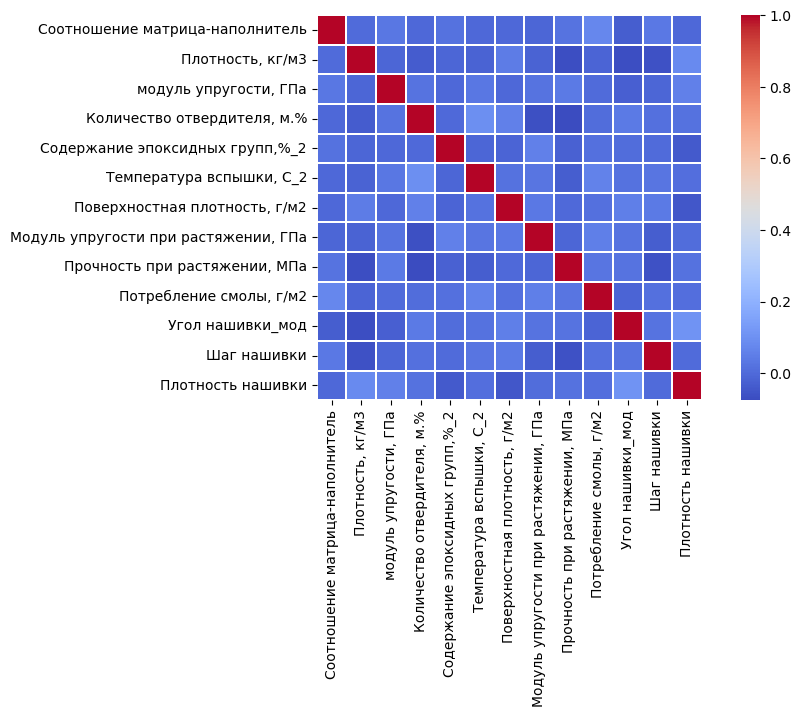

In [37]:
# Тепловая карта коэффициентов корреляции. Вариант 1
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df.corr(), linewidths= .2, square=True, cmap='coolwarm' )

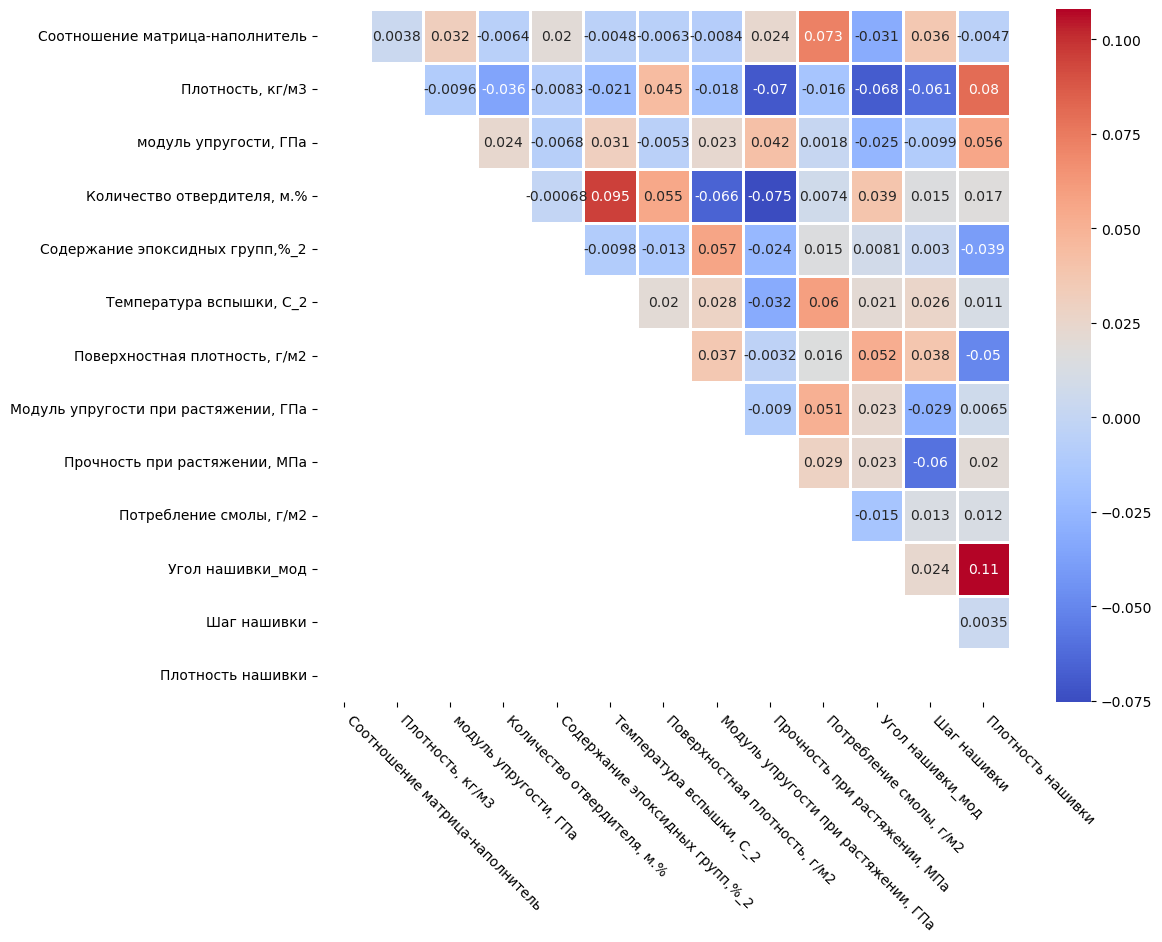

In [38]:
# Тепловая карта коэффициентов корреляции. Вариант 2
# переменная для построения тепловой карты.
Heat_Map = np.tril(df.corr()) # np.tril возвращает верхний треугольник любой заданной ему матрицы
# указываем размеры для отображения
f, ax = plt.subplots(figsize = (12, 9))
# передаем параметры в heatmap и создаем цветовую палитру
sns.heatmap(df.corr(), mask = Heat_Map, annot = True, square = True, cmap = 'coolwarm', linewidths=1, linecolor='white')
plt.xticks(rotation = -45, ha='left') # поворачиваем надпись на 45 градусов влево.
plt.show()

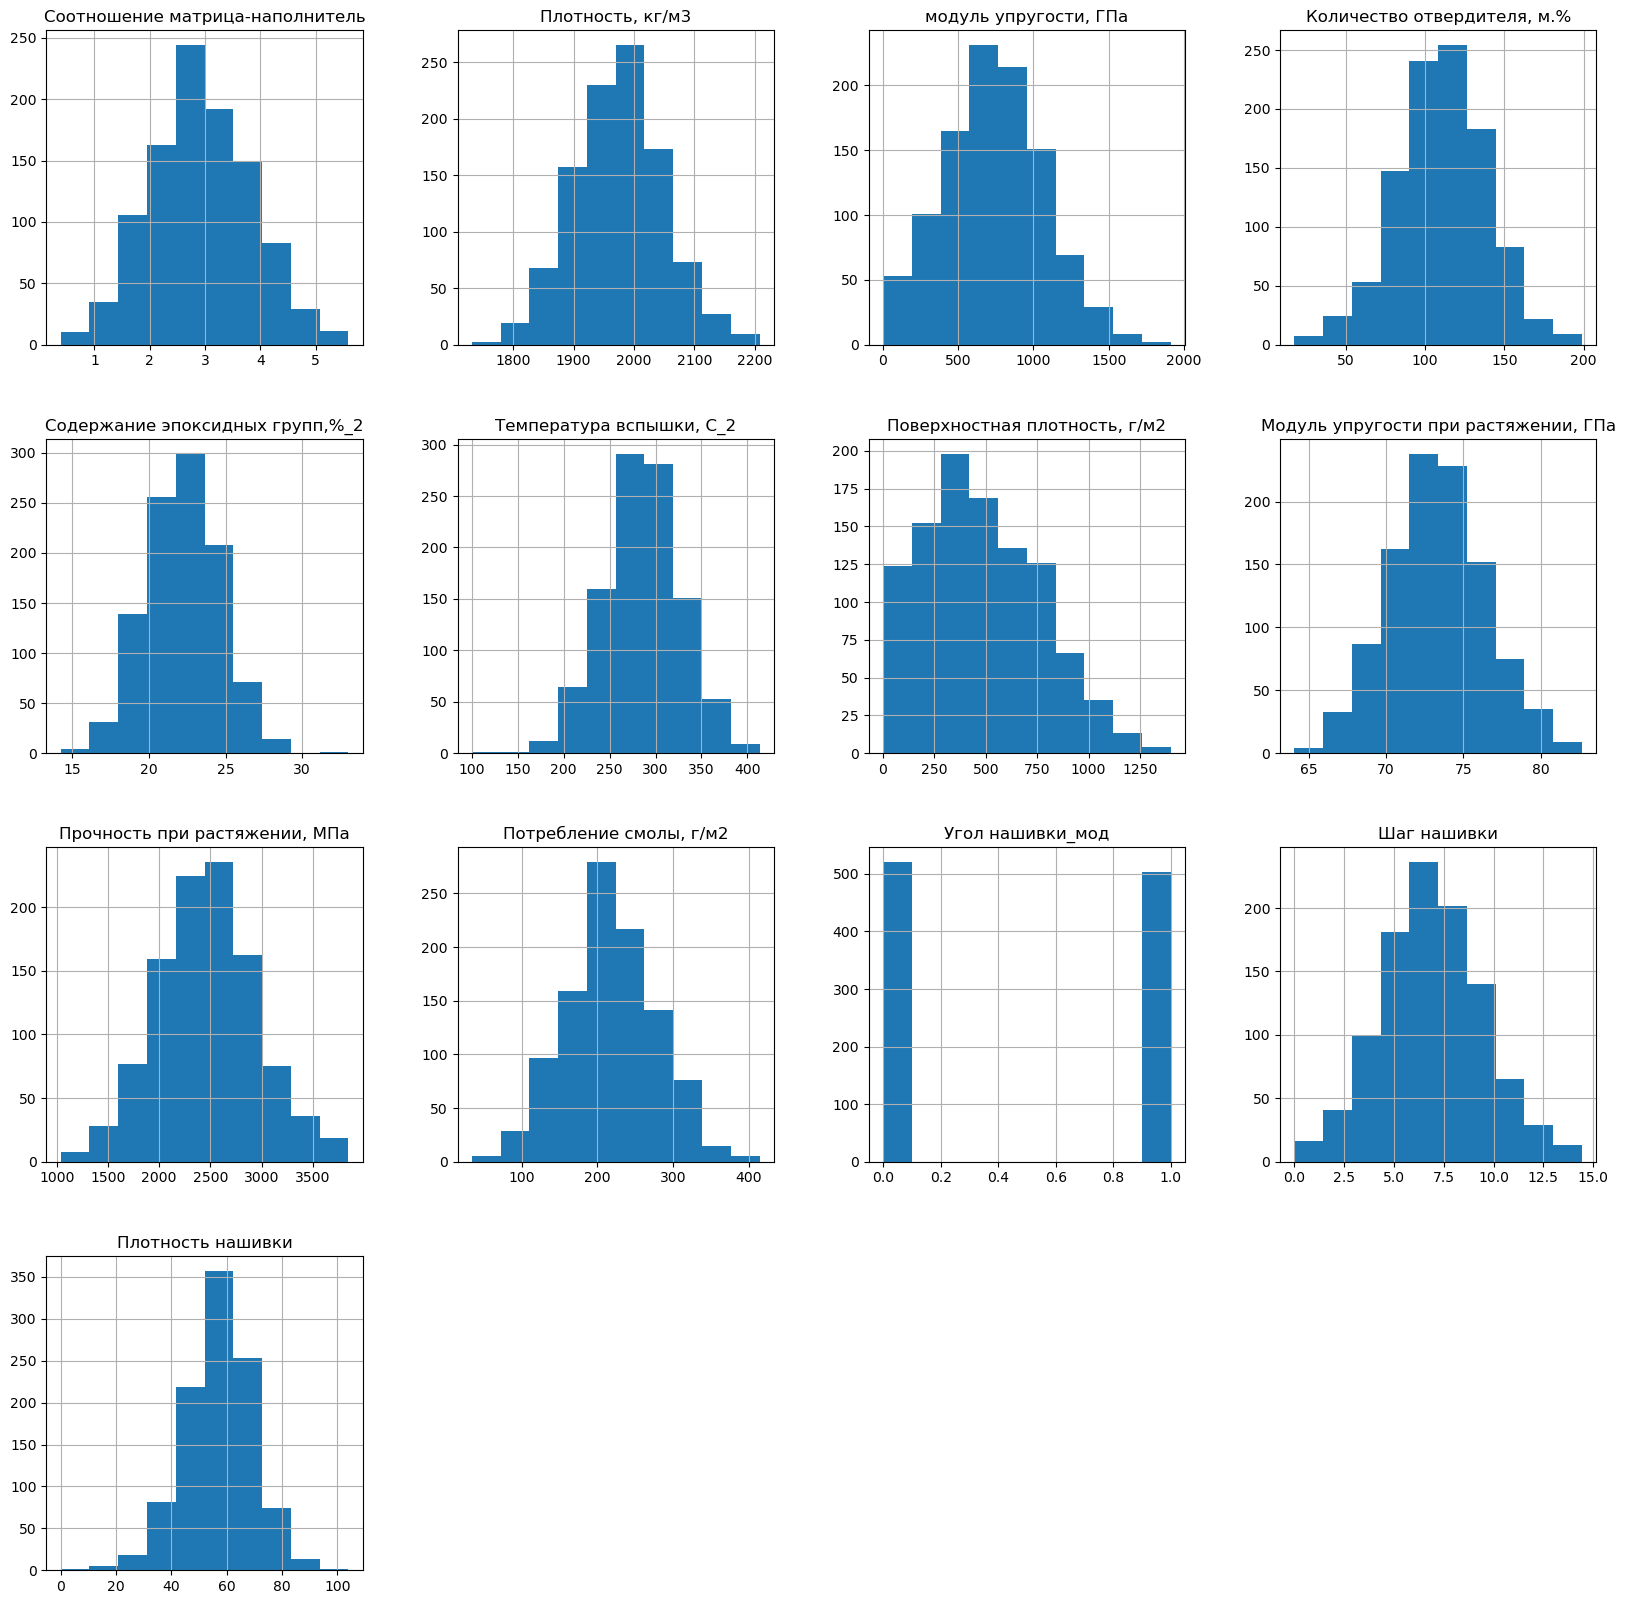

In [39]:
# Построим гистограммы распределения каждой из переменных.
df.hist(figsize = (20,20) )

plt.show()

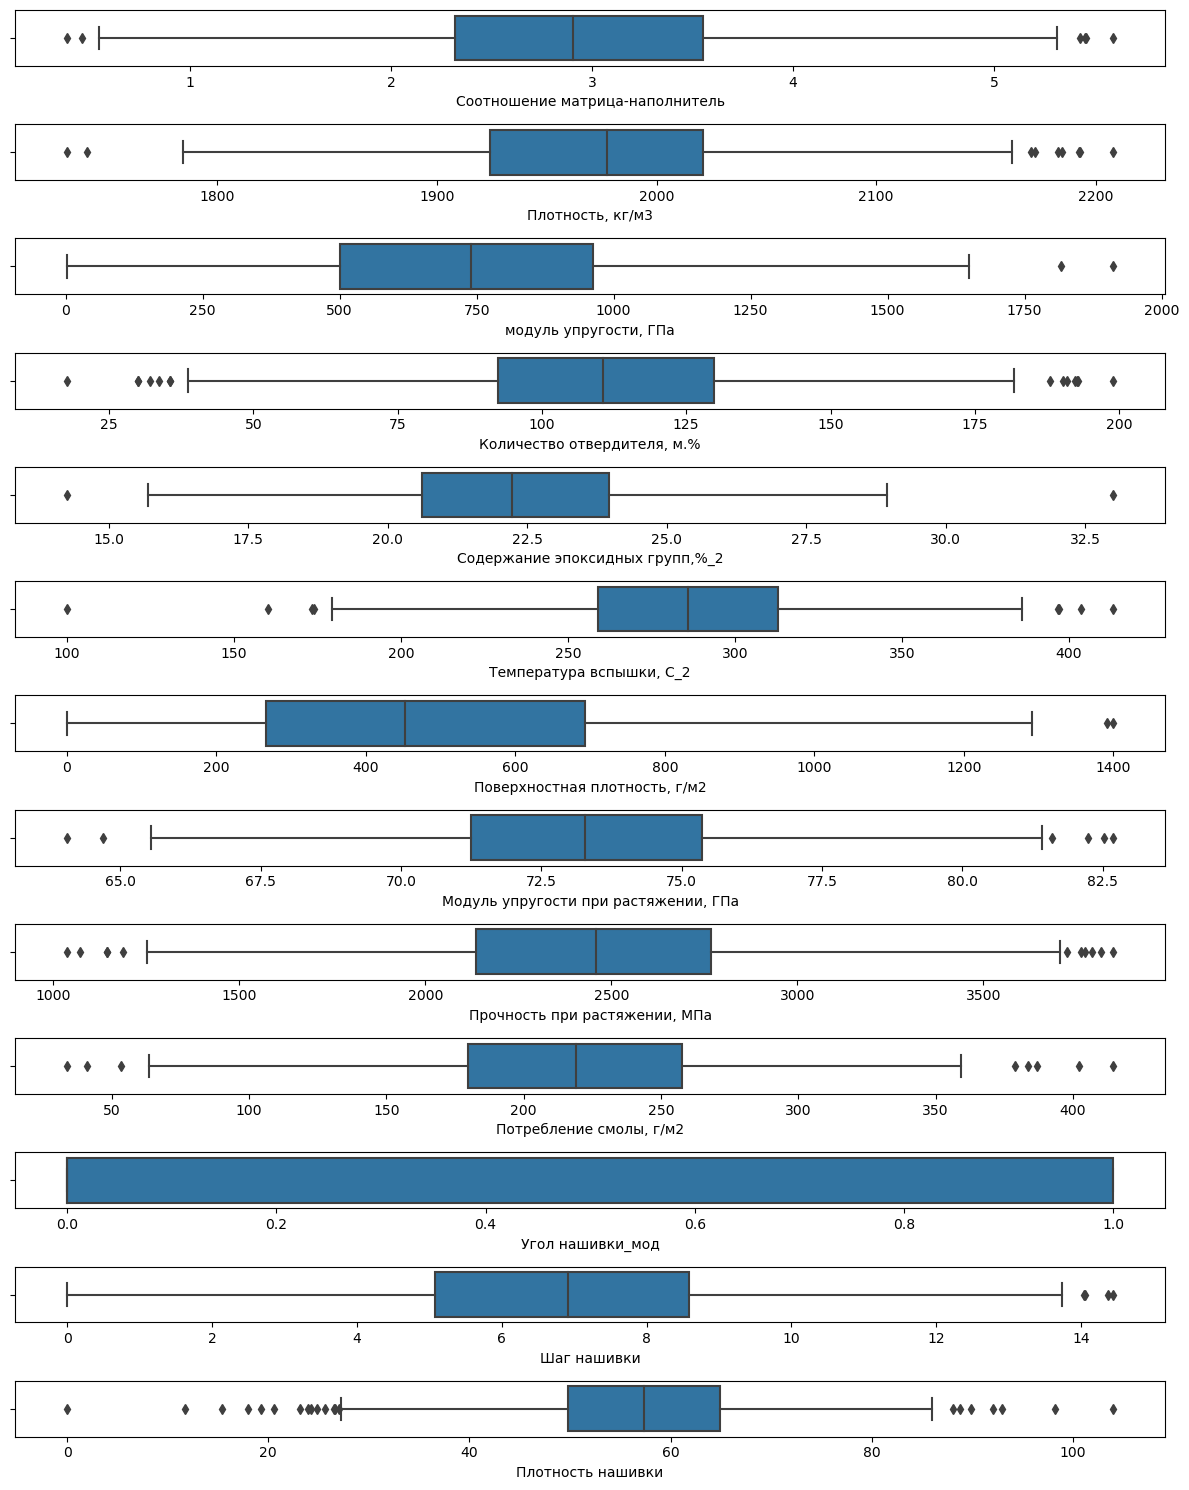

In [40]:
# Проверка, есть ли выбросы на Диаграммах "ящики с усами"
fig, axs = plt.subplots(13, figsize = (12,15))
plt1 = sns.boxplot(df['Соотношение матрица-наполнитель'], ax = axs[0])
plt2 = sns.boxplot(df['Плотность, кг/м3'], ax = axs[1])
plt3 = sns.boxplot(df['модуль упругости, ГПа'], ax = axs[2])
plt4 = sns.boxplot(df['Количество отвердителя, м.%'], ax = axs[3])
plt5 = sns.boxplot(df['Содержание эпоксидных групп,%_2'], ax = axs[4])
plt6 = sns.boxplot(df['Температура вспышки, С_2'], ax = axs[5])
plt7 = sns.boxplot(df['Поверхностная плотность, г/м2'], ax = axs[6])
plt8 = sns.boxplot(df['Модуль упругости при растяжении, ГПа'], ax = axs[7])
plt9 = sns.boxplot(df['Прочность при растяжении, МПа'], ax = axs[8])
plt10 = sns.boxplot(df['Потребление смолы, г/м2'], ax = axs[9])
plt11 = sns.boxplot(df['Угол нашивки_мод'], ax = axs[10])
plt12 = sns.boxplot(df['Шаг нашивки'], ax = axs[11])
plt13 = sns.boxplot(df['Плотность нашивки'], ax = axs[12])
plt.tight_layout()

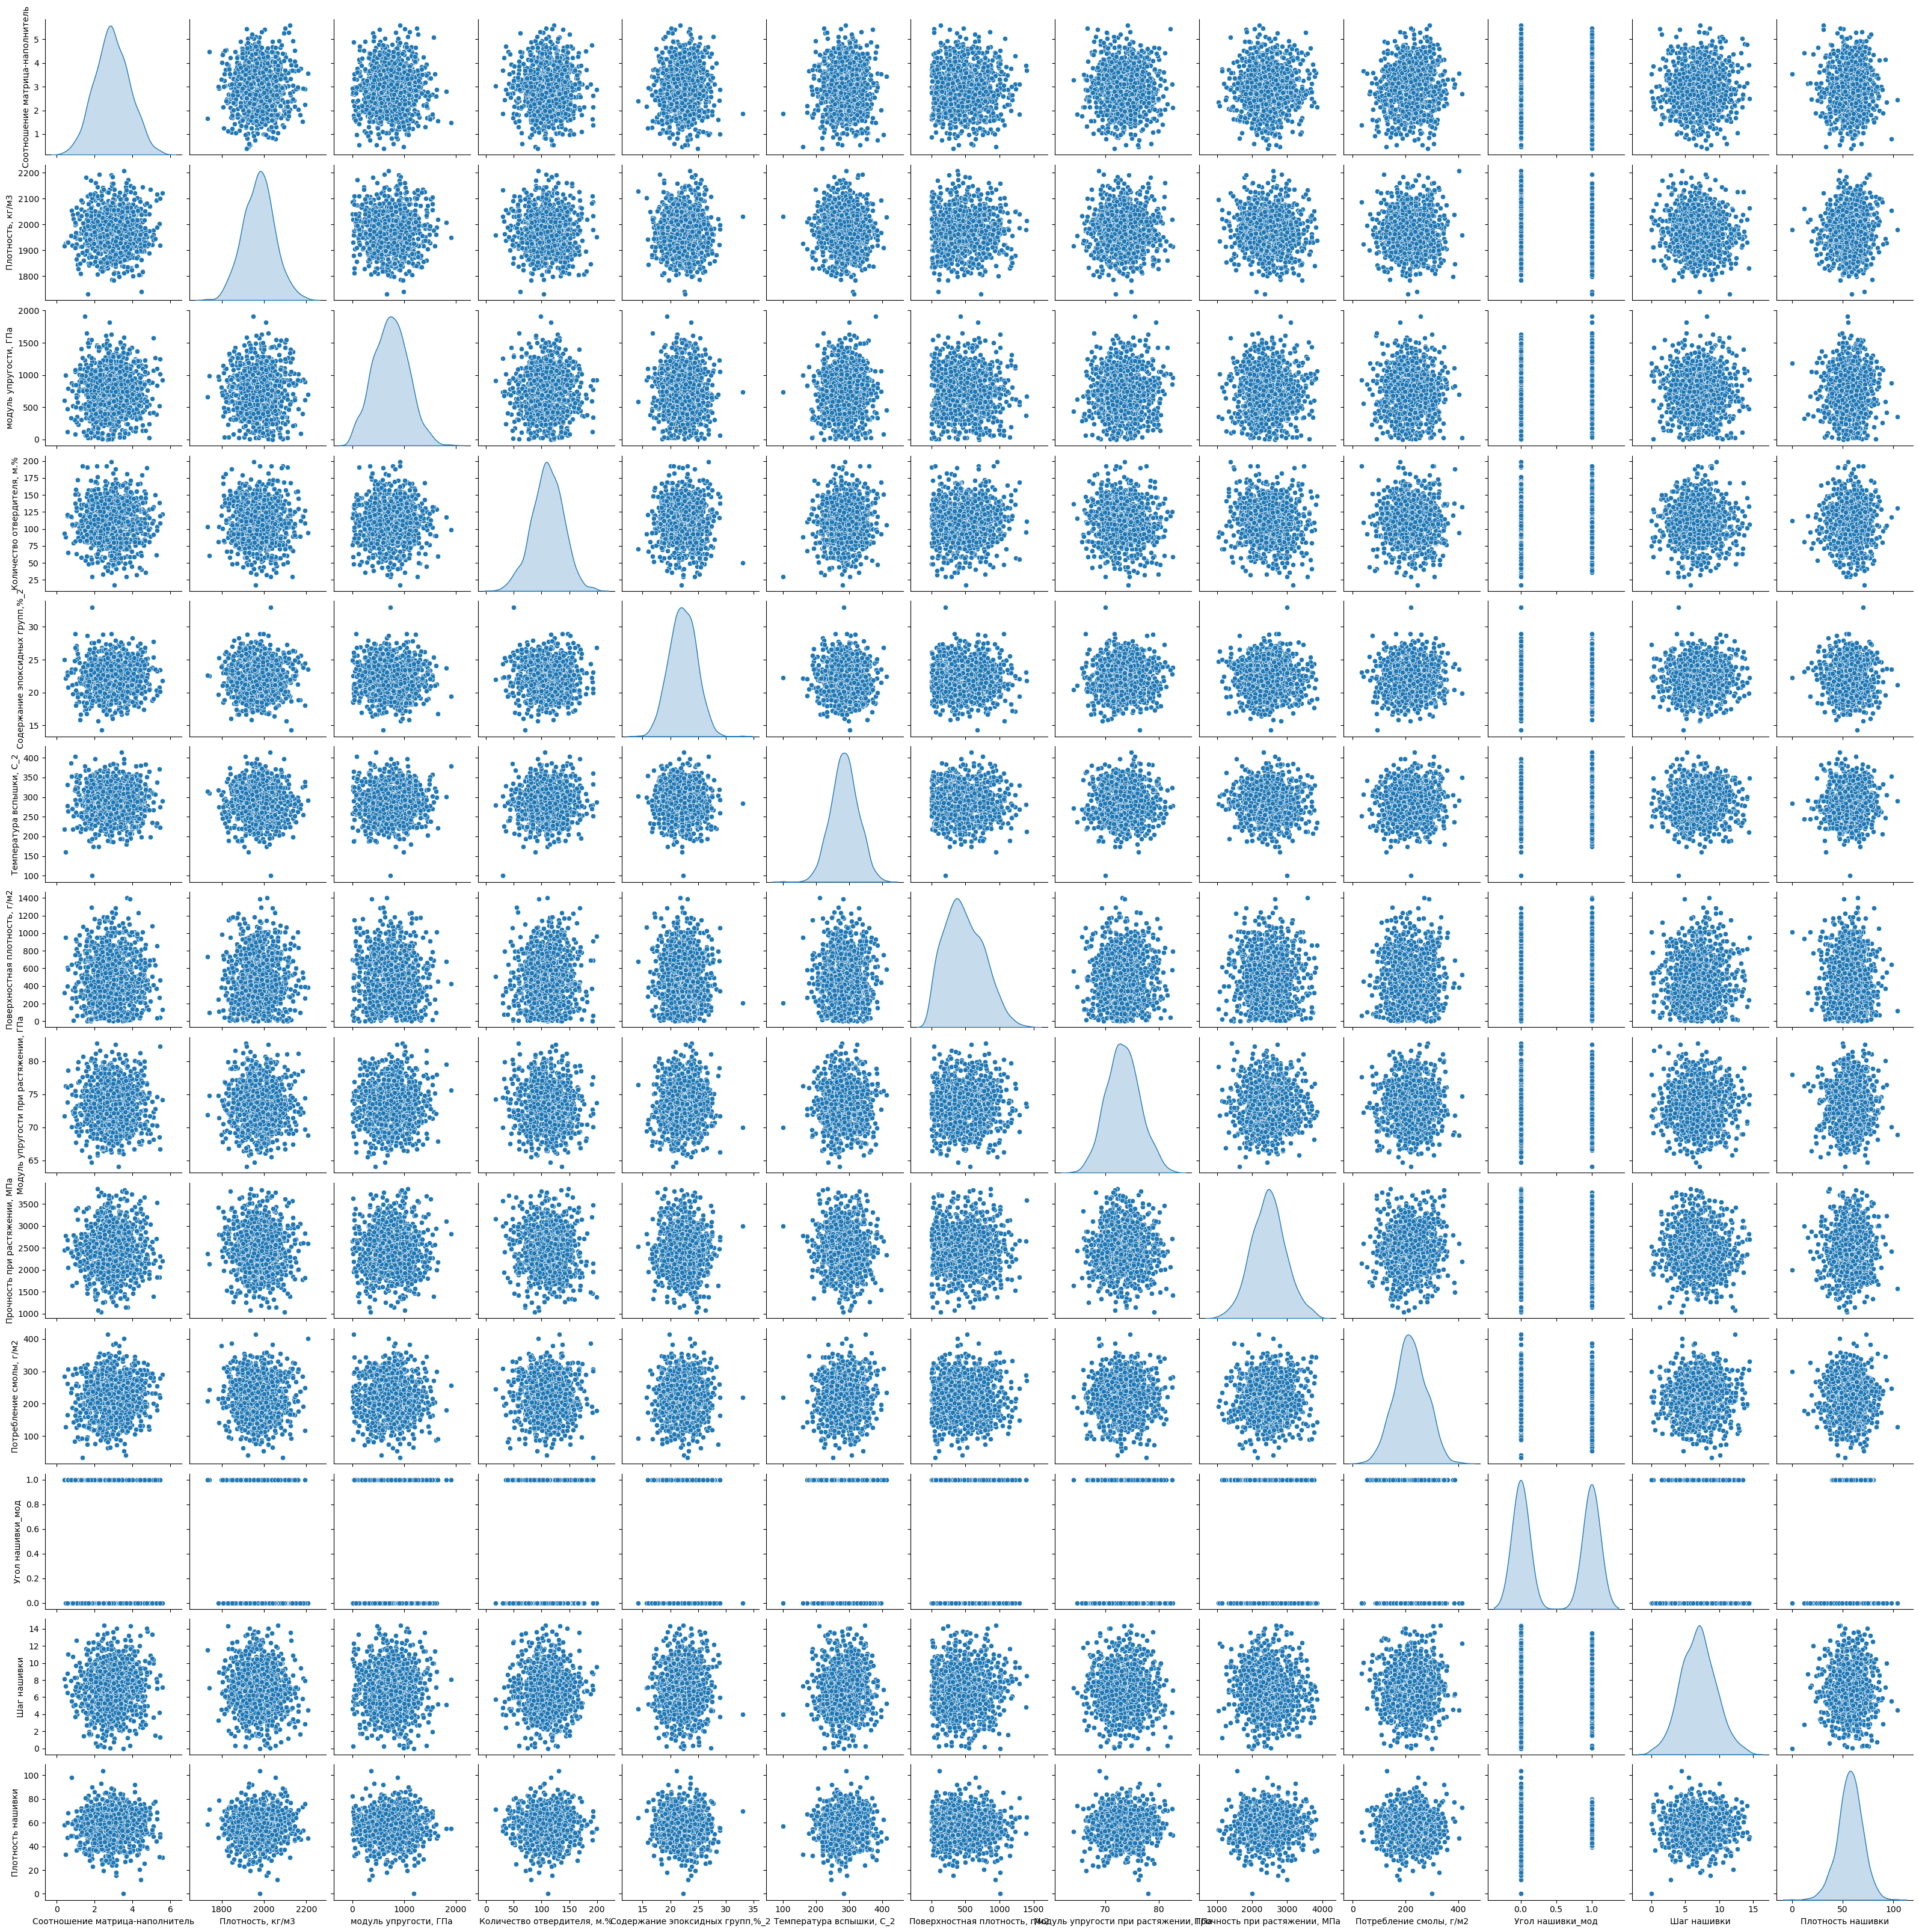

In [41]:
# Попарные графики рассеяния точек
sns.pairplot(df, diag_kind='kde')
plt.show()

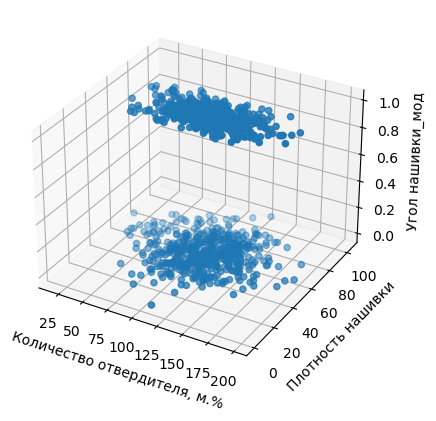

In [42]:
# Построение 3D диаграммы с наиболее коррелируемыми коэффициентами
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
x = df['Количество отвердителя, м.%']
y = df['Плотность нашивки']
z = df['Угол нашивки_мод']

ax.scatter(x, y, z)
ax.set_xlabel("Количество отвердителя, м.%")
ax.set_ylabel("Плотность нашивки")
ax.set_zlabel("Угол нашивки_мод")

plt.show()

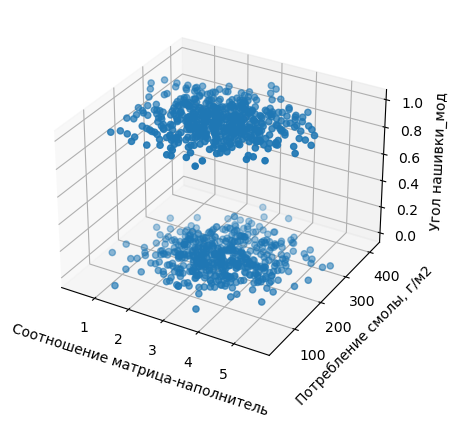

In [43]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection = '3d')
x = df['Соотношение матрица-наполнитель']
y = df['Потребление смолы, г/м2']
z = df['Угол нашивки_мод']
ax1.scatter(x, y, z)
ax1.set_xlabel("Соотношение матрица-наполнитель")
ax1.set_ylabel("Потребление смолы, г/м2")
ax1.set_zlabel("Угол нашивки_мод")
plt.show()

In [ ]:
# Очистка от выбросов

In [44]:
for columns in df.columns: # создадим переменную для всех столбцов
    q75,q25 = np.percentile(df.loc[:,columns],[75,25]) # квантили 25 и 75 %
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[columns] < min,columns] = np.nan
    df.loc[df[columns] > max,columns] = np.nan

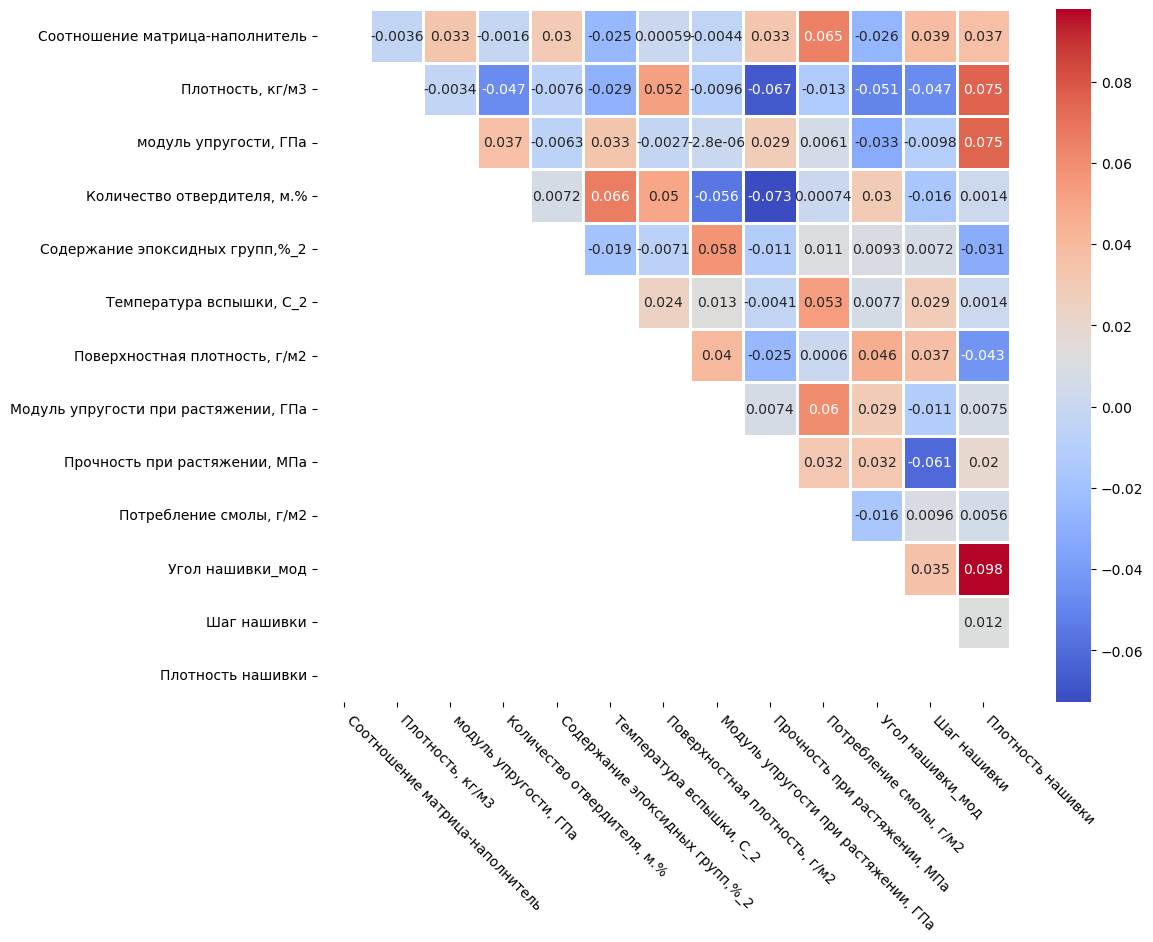

In [46]:
# Тепловая карта коэффициентов корреляции. Вариант 2
# переменная для построения тепловой карты.
Heat_Map = np.tril(df.corr()) # np.tril возвращает верхний треугольник любой заданной ему матрицы
# указываем размеры для отображения
f, ax = plt.subplots(figsize = (12, 9))
# передаем параметры в heatmap и создаем цветовую палитру
sns.heatmap(df.corr(), mask = Heat_Map, annot = True, square = True, cmap = 'coolwarm', linewidths=1, linecolor='white')
plt.xticks(rotation = -45, ha='left') # поворачиваем надпись на 45 градусов влево.
plt.show()

In [45]:
df.isnull().sum() # проверка на пустые значения

Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Угол нашивки_мод                         0
Шаг нашивки                              4
Плотность нашивки                       21
dtype: int64

In [47]:
df = df.dropna(axis=0) # удаление пропусков

In [48]:
df.isnull().sum() # пустые значения удалены

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки_мод                        0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [ ]:
df.info() # Датасет уменьшился

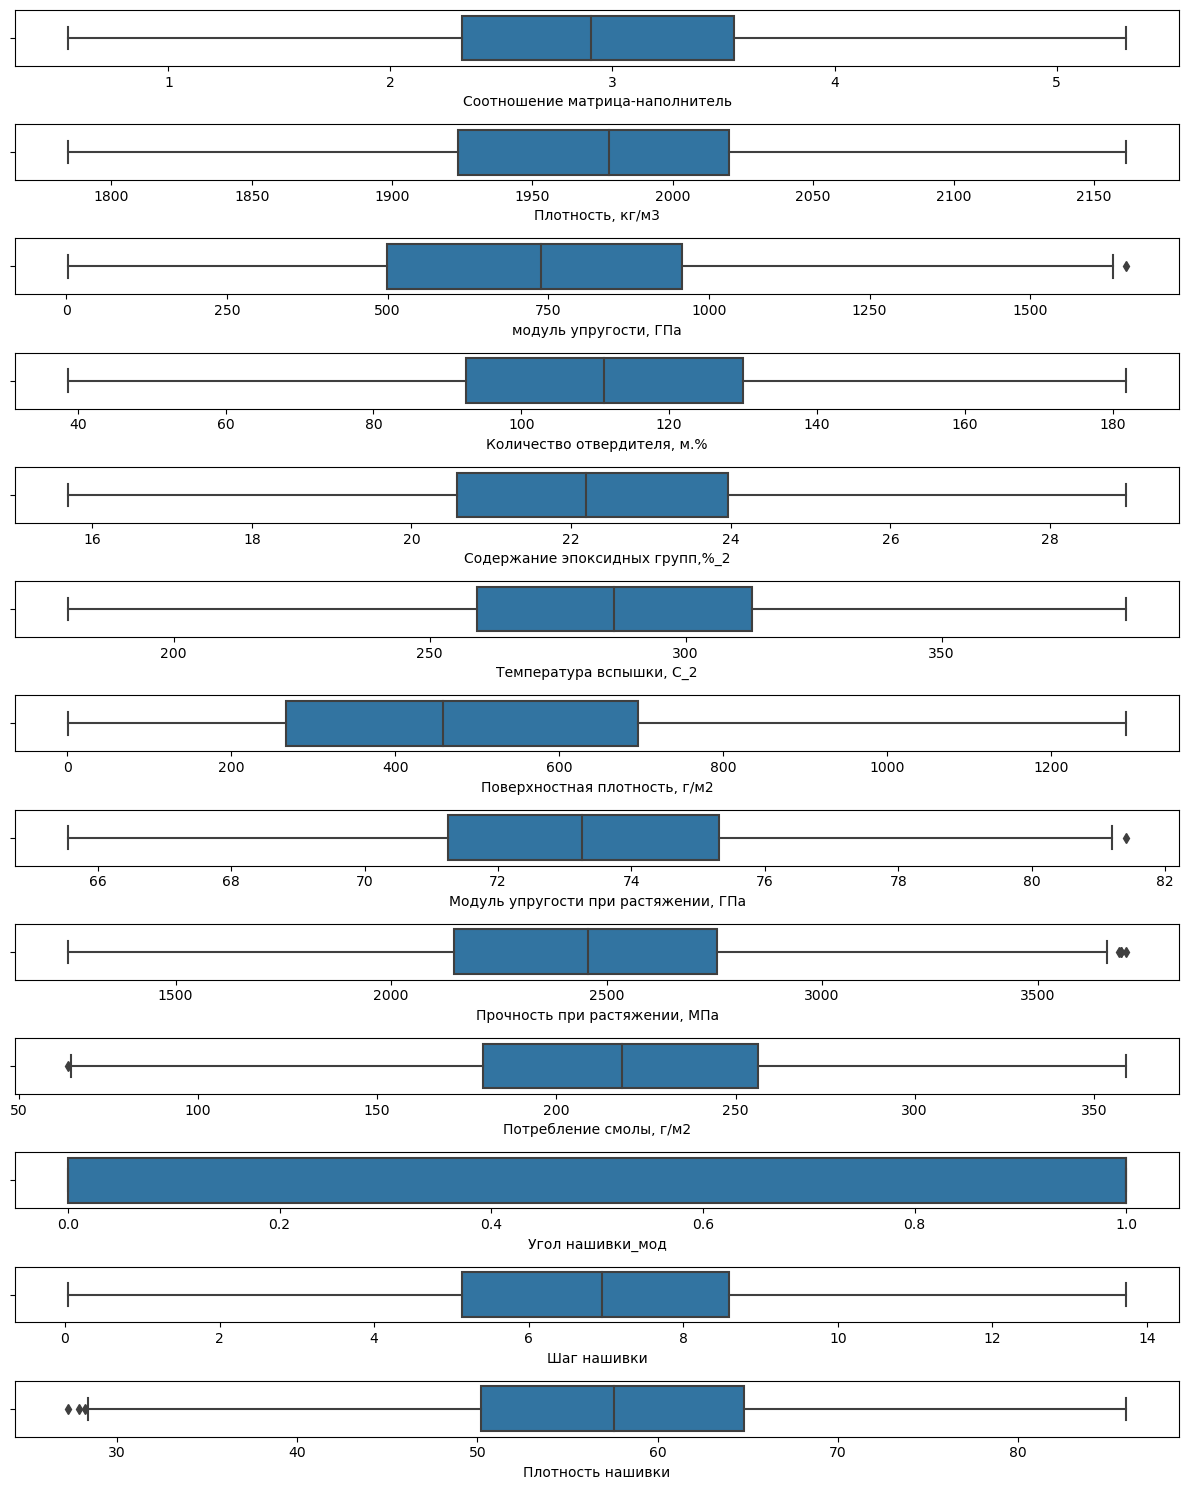

In [50]:
# Проверка как убрались выбросы. Выбросов стало меньше.
fig, axs = plt.subplots(13, figsize = (12,15))
plt1 = sns.boxplot(df['Соотношение матрица-наполнитель'], ax = axs[0])
plt2 = sns.boxplot(df['Плотность, кг/м3'], ax = axs[1])
plt3 = sns.boxplot(df['модуль упругости, ГПа'], ax = axs[2])
plt4 = sns.boxplot(df['Количество отвердителя, м.%'], ax = axs[3])
plt5 = sns.boxplot(df['Содержание эпоксидных групп,%_2'], ax = axs[4])
plt6 = sns.boxplot(df['Температура вспышки, С_2'], ax = axs[5])
plt7 = sns.boxplot(df['Поверхностная плотность, г/м2'], ax = axs[6])
plt8 = sns.boxplot(df['Модуль упругости при растяжении, ГПа'], ax = axs[7])
plt9 = sns.boxplot(df['Прочность при растяжении, МПа'], ax = axs[8])
plt10 = sns.boxplot(df['Потребление смолы, г/м2'], ax = axs[9])
plt11 = sns.boxplot(df['Угол нашивки_мод'], ax = axs[10])
plt12 = sns.boxplot(df['Шаг нашивки'], ax = axs[11])
plt13 = sns.boxplot(df['Плотность нашивки'], ax = axs[12])
plt.tight_layout()

In [51]:
from sklearn.preprocessing import MinMaxScaler # Импорт метода нормализации

In [52]:
min_max_scaler = MinMaxScaler()
df_min_max = pd.DataFrame(min_max_scaler.fit_transform(df), columns = df.columns, index=df.index)

In [54]:
df_min_max.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                       936.000000        936.000000   
mean                          0.498933          0.502695   
std                           0.187489          0.187779   
min                           0.000000          0.000000   
25%                           0.372274          0.368517   
50%                           0.494538          0.511229   
75%                           0.629204          0.624999   
max                           1.000000          1.000000   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count             936.000000                   936.000000   
mean                0.446764                     0.504664   
std                 0.199583                     0.188865   
min                 0.000000                     0.000000   
25%                 0.301243                     0.376190   
50%                 0.447061                     0.506040   
75%                 0.580446                     0.637978   
max                 1.000000                     1.000000   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                       936.000000                936.000000   
mean                          0.491216                  0.516059   
std                           0.180620                  0.190624   
min                           0.000000                  0.000000   
25%                           0.367716                  0.386128   
50%                           0.489382                  0.515980   
75%                           0.623410                  0.646450   
max                           1.000000                  1.000000   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                     936.000000                            936.000000   
mean                        0.373733                              0.488647   
std                         0.217078                              0.191466   
min                         0.000000                              0.000000   
25%                         0.205619                              0.359024   
50%                         0.354161                              0.485754   
75%                         0.538683                              0.615077   
max                         1.000000                              1.000000   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                     936.000000               936.000000   
mean                        0.495706                 0.521141   
std                         0.188915                 0.195781   
min                         0.000000                 0.000000   
25%                         0.365149                 0.392067   
50%                         0.491825                 0.523766   
75%                         0.612874                 0.652447   
max                         1.000000                 1.000000   

       Угол нашивки_мод  Шаг нашивки  Плотность нашивки  
count        936.000000   936.000000         936.000000  
mean           0.511752     0.502232           0.513776  
std            0.500129     0.183258           0.191342  
min            0.000000     0.000000           0.000000  
25%            0.000000     0.372211           0.390482  
50%            1.000000     0.504258           0.516029  
75%            1.000000     0.624604           0.638842  
max            1.000000     1.000000           1.000000

In [55]:
# Сохраним датасет в папку data с название inner.xlsx.
df.to_excel("data\inner.xlsx")

In [56]:
# Модели для прогноза модуля упругости при растяжении и прочности при растяжении

In [57]:
# Метод К ближайших соседей

In [58]:
# переменная x_MU - это Модуль упругости при растяжении
# переменная x_PR - это Прочность при растяжении

# убираем столбец Модуль упругости при растяжении, ГПа МПа из пронога
x_MU = df_min_max.drop(['Модуль упругости при растяжении, ГПа'], axis=1)

# убираем столбец Прочность при растяжении, МПа из пронога
x_PR = df_min_max.drop(['Прочность при растяжении, МПа'], axis=1)

# Присваиваем значения столбцов перемнным y_MU и y_PR 
y_MU = df_min_max[['Модуль упругости при растяжении, ГПа']]
y_PR = df_min_max[['Прочность при растяжении, МПа']]

# разделяем выборку на тестовую и обучающую, размер 30%
X_train_MU, X_test_MU, y_train_MU, y_test_MU = train_test_split(x_MU, y_MU, test_size=0.3, random_state=1)
X_train_PR, X_test_PR, y_train_PR, y_test_PR = train_test_split(x_PR, y_PR, test_size=0.3, random_state=1)

In [59]:
K = KNeighborsRegressor()
K_params = {'n_neighbors' : range(1, 301, 2), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto']
          }
Grid_K_MU = GridSearchCV(K, K_params, n_jobs=-1, cv=10)
Grid_K_MU.fit(X_train_MU, y_train_MU) # обучение модели методом fit и данными
Grid_K_MU.best_params_ # вывод результата

{'algorithm': 'auto', 'n_neighbors': 59, 'weights': 'uniform'}

In [60]:
K_MU = Grid_K_MU.best_estimator_
print(f'R2-score KNR для Модуля упругости при растяжении: {K_MU.score(X_test_MU, y_test_MU).round(4)}')

R2-score KNR для Модуля упругости при растяжении: -0.0046


In [61]:
models = pd.DataFrame()

In [62]:
K_MU_result = pd.DataFrame({
   'Model': 'KNeighborsRegressor_MU', 
   'MAE': mean_absolute_error(y_test_MU, K_MU.predict(X_test_MU)), 
   'R2 score': K_MU.score(X_test_MU, y_test_MU).round(3)
}, index=['Модуль упругости при растяжении, ГПа'])

In [63]:
models = pd.concat([models, K_MU_result])
models

Model       MAE  \
Модуль упругости при растяжении, ГПа  KNeighborsRegressor_MU  0.160652   

                                      R2 score  
Модуль упругости при растяжении, ГПа    -0.005

In [64]:
# Случайный лес

In [65]:
# Модуль упругости при растяжении, ГПа

In [66]:
forest = RandomForestRegressor()
forest_params = {
    'n_estimators' : range(10, 1000, 10),
    'criterion' : ['squared_error', 'absolute_error', 'poisson'],
    'max_depth' : range(1, 7),
    'min_samples_split' : range(20, 50, 5),
    'min_samples_leaf' : range(2, 8),
    'bootstrap' : ['True', 'False']
}
forest_MU = RandomizedSearchCV(forest, forest_params, n_jobs=-1, cv=10, verbose=1)
forest_MU.fit(X_train_MU, np.ravel(y_train_MU))
forest_MU.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'n_estimators': 260,
 'min_samples_split': 40,
 'min_samples_leaf': 2,
 'max_depth': 1,
 'criterion': 'squared_error',
 'bootstrap': 'True'}

In [67]:
forest_MU = forest_MU.best_estimator_
print(f'R2-score RFR для модуля упругости при растяжении: {forest_MU.score(X_test_MU, y_test_MU).round(3)}')

R2-score RFR для модуля упругости при растяжении: -0.01


In [68]:
# Прочность при растяжении, МПа

In [69]:
forest = RandomForestRegressor()
forest_params = {
    'n_estimators' : range(10, 1000, 10),
    'criterion' : ['squared_error', 'absolute_error', 'poisson'],
    'max_depth' : range(1, 7),
    'min_samples_split' : range(20, 50, 5),
    'min_samples_leaf' : range(2, 8),
    'bootstrap' : ['True', 'False']
}
forest_PR = RandomizedSearchCV(forest, forest_params, n_jobs=-1, cv=10, verbose=1)
forest_PR.fit(X_train_PR, np.ravel(y_train_PR))
forest_PR.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'n_estimators': 330,
 'min_samples_split': 35,
 'min_samples_leaf': 6,
 'max_depth': 2,
 'criterion': 'absolute_error',
 'bootstrap': 'True'}

In [70]:
forest_PR = forest_PR.best_estimator_
print(f'R2-score RFR для прочности при растяжении: {forest_PR.score(X_test_PR, y_test_PR).round(3)}')

R2-score RFR для прочности при растяжении: -0.007


In [71]:
# Построение Нейронной сети

In [72]:
# 2 скрытых слоя по 8 нейронов.
# ИМПОРТ

import os
import tensorflow as tf
import math

import pandas as pd 
import numpy as np
import scipy

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# tensor flow - глубокое обучение
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory


# для визуализации
from matplotlib import pyplot

%matplotlib inline

In [73]:
# ЗАГРУЗКА ФАЙЛОВ
path = r'C:\users\leon-\BKP\data\inner.xlsx'
df = pd.read_excel(path, header=0, index_col = 0)
df.head(5)

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
1                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   
5                         2.767918            2000.0             748.000000   
6                         2.569620            1910.0             807.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
1                        50.00                        23.750000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   
5                       111.86                        22.267857   
6                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
1                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   
5                284.615385                          210.0   
6                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
1                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   
5                                  70.0                         3000.0   
6                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки_мод  Шаг нашивки  Плотность нашивки  
1                    220.0                 0          4.0               60.0  
3                    220.0                 0          5.0               47.0  
4                    220.0                 0          5.0               57.0  
5                    220.0                 0          5.0               60.0  
6                    220.0                 0          5.0               70.0

In [74]:
df.info() # общая информация о датасете и типы данных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 1 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       936 non-null    float64
 1   Плотность, кг/м3                      936 non-null    float64
 2   модуль упругости, ГПа                 936 non-null    float64
 3   Количество отвердителя, м.%           936 non-null    float64
 4   Содержание эпоксидных групп,%_2       936 non-null    float64
 5   Температура вспышки, С_2              936 non-null    float64
 6   Поверхностная плотность, г/м2         936 non-null    float64
 7   Модуль упругости при растяжении, ГПа  936 non-null    float64
 8   Прочность при растяжении, МПа         936 non-null    float64
 9   Потребление смолы, г/м2               936 non-null    float64
 10  Угол нашивки_мод                      936 non-null    int64  
 11  Шаг нашивки       

In [75]:
df['Угол нашивки_мод'].value_counts()  # количество уникальных значений 

1    479
0    457
Name: Угол нашивки_мод, dtype: int64

In [76]:
##Создание выборок
# Создаем х и у
X, y = df.values[:, : -1], df.values[:, -1]

In [77]:
# LabelEncoder для у

y= LabelEncoder().fit_transform(y) # обучим у командой fit_transform

In [78]:
# Создание тестовой и обучающей выборки

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, shuffle = True)
# X, y - передаем параметры, test_size= 0.3 - размер тестовой выборки, shuffle = true -перемешивание датасета

In [79]:
print(X_train.shape) #проверим размерность выборок должно совпадать
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(655, 12)
(281, 12)
(655,)
(281,)


In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.multioutput import ClassifierChain
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import jaccard_score
from sklearn.linear_model import LogisticRegression

In [81]:
normalizer = tf.keras.layers.Normalization(axis=-1) # нормализация данных
normalizer.adapt(np.array(X))

Epoch 1/100
21/21 [==============================] - 1s 6ms/step - loss: -228.5060 - val_loss: -294.4608
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: -324.1787 - val_loss: -398.6812
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: -428.4973 - val_loss: -516.5762
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: -548.3052 - val_loss: -655.3215
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: -690.1469 - val_loss: -823.1663
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: -861.4025 - val_loss: -1020.2615
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: -1063.6074 - val_loss: -1256.2357
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: -1306.2628 - val_loss: -1534.1725
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: -1589.5308 - val_loss: -1871.5254
Epoch 10/100
21/21 [============================

21/21 [==============================] - 0s 2ms/step - loss: -464878.5625 - val_loss: -484860.5938
Epoch 76/100
21/21 [==============================] - 0s 2ms/step - loss: -482250.0625 - val_loss: -502265.9688
Epoch 77/100
21/21 [==============================] - 0s 2ms/step - loss: -499701.5000 - val_loss: -520397.6562
Epoch 78/100
21/21 [==============================] - 0s 2ms/step - loss: -517671.5312 - val_loss: -538653.1250
Epoch 79/100
21/21 [==============================] - 0s 2ms/step - loss: -535913.1875 - val_loss: -557480.0000
Epoch 80/100
21/21 [==============================] - 0s 2ms/step - loss: -554557.0625 - val_loss: -576991.6875
Epoch 81/100
21/21 [==============================] - 0s 2ms/step - loss: -573955.8125 - val_loss: -596228.1875
Epoch 82/100
21/21 [==============================] - 0s 2ms/step - loss: -593213.1875 - val_loss: -615960.6250
Epoch 83/100
21/21 [==============================] - 0s 2ms/step - loss: -612964.8750 - val_loss: -636266.8125
Epoch

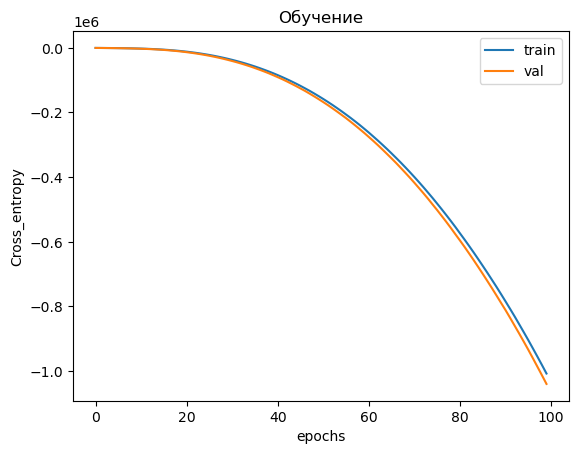

In [85]:
#Нейронная сеть
# 2 скрытых слоя по 8 нейронов.
n_features = X.shape[1] # размерность Х

model = Sequential() # модель последовательная
model.add(normalizer)
model.add(Dense(8, activation = 'relu', input_shape = (n_features,  ))) # input_shape - Входная размерность в Х
model.add(Dense(8, activation = 'relu'))


# выходной слой
model.add(Dense(1, activation = 'sigmoid'))
# Компилирование 
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0008),
              loss=tf.keras.losses.BinaryCrossentropy())

# Обучение модели
history = model.fit(X_train, y_train,
                    epochs = 100,
                    batch_size = 32,
                    verbose = 1,
                    validation_data = (X_test, y_test))

yhat = model.predict(X_test)

# подсчет прогноза
score = accuracy_score(y_test, yhat)
print ('Accuracy: ', score)
# визуализация процесса обучения
pyplot.title('Обучение')
pyplot.xlabel('epochs') # по оси х - эпохи
pyplot.ylabel('Cross_entropy') # по оси у - ошибка
pyplot.plot(history.history['loss'], label = 'train')
pyplot.plot(history.history['val_loss'], label = 'val')
pyplot.legend()
pyplot.show()

In [86]:
print ('Accuracy: ', score)

Accuracy:  0.0


In [87]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense_3 (Dense)             (None, 8)                 104       
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 210
Trainable params: 185
Non-trainable params: 25
_________________________________________________________________


In [25]:
# Cохранение модели

In [26]:
model_path = "my_model_1" 

In [27]:
model.save(model_path)

INFO:tensorflow:Assets written to: my_model_1\assets


INFO:tensorflow:Assets written to: my_model_1\assets
